<a href="https://colab.research.google.com/github/ganesh-3000/GM2023502003/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00


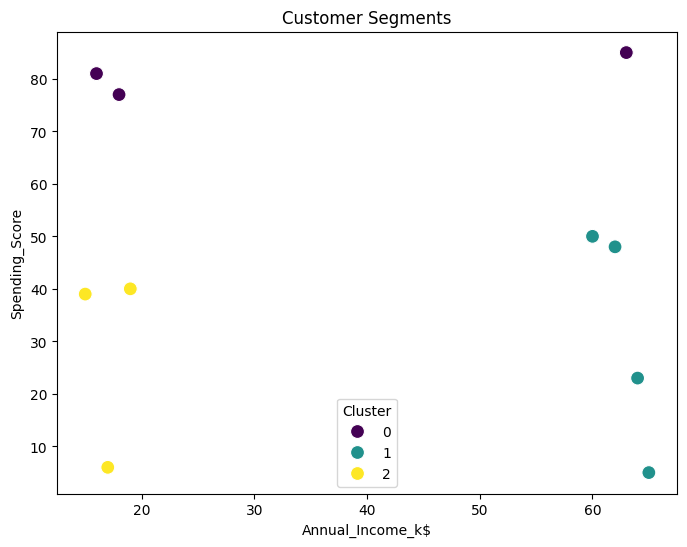

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e19d22011fb90fd248.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn scikit-learn gradio

# ------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import gradio as gr

# ------------------------------
# 2. LOAD OR CREATE SAMPLE DATA
# ------------------------------
# Sample e-commerce customer data
# Features: Annual Income (k$), Spending Score (1-100)
data = {
    'CustomerID': range(1, 11),
    'Annual_Income_k$': [15, 16, 17, 18, 19, 60, 62, 63, 64, 65],
    'Spending_Score': [39, 81, 6, 77, 40, 50, 48, 85, 23, 5]
}
df = pd.DataFrame(data)

# ------------------------------
# 3. PREPROCESSING
# ------------------------------
X = df[['Annual_Income_k$', 'Spending_Score']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 4. APPLY K-MEANS
# ------------------------------
# Choose number of clusters (you can use Elbow method if needed)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ------------------------------
# 5. VISUALIZE CLUSTERS
# ------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual_Income_k$', y='Spending_Score',
    hue='Cluster', palette='viridis',
    data=df, s=100
)
plt.title('Customer Segments')
plt.show()

# ------------------------------
# 6. GRADIO INTERFACE (OPTIONAL)
# ------------------------------
def predict_cluster(income, score):
    input_scaled = scaler.transform([[income, score]])
    cluster = kmeans.predict(input_scaled)[0]
    return f"Predicted Segment: Cluster {cluster}"

interface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Annual Income (k$)", value=40),
        gr.Number(label="Spending Score", value=50)
    ],
    outputs="text",
    title="E-commerce Customer Segmentation",
    description="Enter income and spending score to find out the customer segment (cluster).",
)

interface.launch(share=True)
